In [2]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.graph_objects as go

In [3]:
from datetime import datetime

In [4]:
CB201711 = "./citybick/201711-citibike-tripdata.csv"
CB201808 = "./citybick/201808-citibike-tripdata.csv"
CB201809 = "./citybick/201809-citibike-tripdata.csv"
CB201810 = "./citybick/201810-citibike-tripdata.csv"
CB201811 = "./citybick/201811-citibike-tripdata.csv"
CB201812 = "./citybick/201812-citibike-tripdata.csv"
CB201901 = "./citybick/201901-citibike-tripdata.csv"
CB201902 = "./citybick/201902-citibike-tripdata.csv"
CB201903 = "./citybick/201903-citibike-tripdata.csv"
CB201904 = "./citybick/201904-citibike-tripdata.csv"
CB201905 = "./citybick/201905-citibike-tripdata.csv"

In [5]:
import dateutil
from pandas.tseries.offsets import Day, Hour, Minute, Second

def csv2ts(csv_file: str):
    pkl_path = "./pickles/" + csv_file[2:] + ".pkl"
    
    if os.path.isfile(pkl_path):
        return pd.read_pickle(pkl_path)
    
    trip_data = pd.read_csv(csv_file)
    
    trip_data_ts = trip_data['starttime'].apply(lambda x: dateutil.parser.parse(x))
    
    pd.to_pickle(trip_data_ts, pkl_path)
    return trip_data_ts

def divide2day(data):
    
    # 生成每天gap
    def produce_day_gaps(data):
        year, month, start_day, end_day = data[0].year, data[0].month, data[0].day, data[len(data)-1].day
        start = "/".join(map(lambda x:str(x),[year, month, start_day]))
        end = "/".join(map(lambda x:str(x), [year, month, end_day]))
        end = pd.Timestamp(end) + Day(1)
        gaps = pd.date_range(start, end, freq="1d")
        return gaps
    
    ts = csv2ts(data)
    gaps = produce_day_gaps(ts)
    
    days = []
    for i in range(1, len(gaps)):
        temp = ts[(ts>=gaps[i-1])&(ts<gaps[i])]
        temp = temp.reset_index(drop=True)
        days.append(temp)
    
    return days

## 将一个月的数据切分成每天的数据 CB201810

In [32]:
days= divide2day(CB201810)

In [7]:
# month_prefix = "./citybick/CB201810"
# for idx, day in enumerate(days):
#     days[idx].to_frame().to_csv(month_prefix+"/"+"CB201810{0:02d}.csv".format(idx+1), quoting=1, index=False)

## 将一个月的数据切分成每天的数据 CB201809

In [21]:
# days= divide2day(CB201809)

In [35]:
# month_prefix = "./citybick/CB201809"
# for idx, day in enumerate(days):
#     days[idx].to_frame().to_csv(month_prefix+"/"+"CB201809{0:02d}.csv".format(idx+1), quoting=1, index=False)

## 模拟启发式水印

In [30]:
def simulate_watermark(data, latency):
    count = len(data)
    later = 0
    max_wm = 0
    for d in data:
        if d.value//10**6 <= max_wm:
            later += 1
            continue
        new_wm = d.value//10**6 - latency
        if new_wm > max_wm:
            max_wm = new_wm
    return later / count

100%|██████████| 51/51 [00:19<00:00,  2.62it/s]


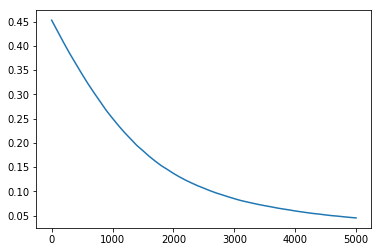

In [50]:
latencys = [i for i in range(0, 5001, 100)]
res = []
for la in tqdm(latencys):
    res.append(simulate_watermark(days[0], la))
plt.plot(latencys, res)

In [ ]:
res = []
for la in tqdm(latencys):
    res.append(simulate_watermark(days[1], la))
plt.plot(latencys, res)